# 65세 미만 운전자 및 고령 운전자 안전운전의무불이행 교통사고 추이

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
traffic_accident_safe_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_safe_5`
    ORDER BY
        age_group
"""

In [5]:
traffic_accident_safe_df = client.query(traffic_accident_safe_sql).to_dataframe()
traffic_accident_safe_df = traffic_accident_safe_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
traffic_accident_safe_df

,safe_2019,safe_2020,safe_2021,safe_2022,safe_2023
age_group,,,,,
10,3999,4027,3848,3720,3232
20,17070,16483,15930,15094,14051
30,19704,17923,16938,16524,15732
40,24226,21327,20405,19364,18762
50,30000,27664,25686,25123,24582
60,10473,9722,10027,10610,11050
65,17743,16825,16979,19002,21653


In [7]:
traffic_accident_safe_df.loc["65-"] = traffic_accident_safe_df[traffic_accident_safe_df.index != 65].sum(axis=0)
traffic_accident_safe_df = traffic_accident_safe_df.rename(index={65: "65+"})
traffic_accident_safe_df = traffic_accident_safe_df.loc[["65-", "65+"]]

In [8]:
traffic_accident_safe_df

,safe_2019,safe_2020,safe_2021,safe_2022,safe_2023
age_group,,,,,
65-,105472,97146,92834,90435,87409
65+,17743,16825,16979,19002,21653


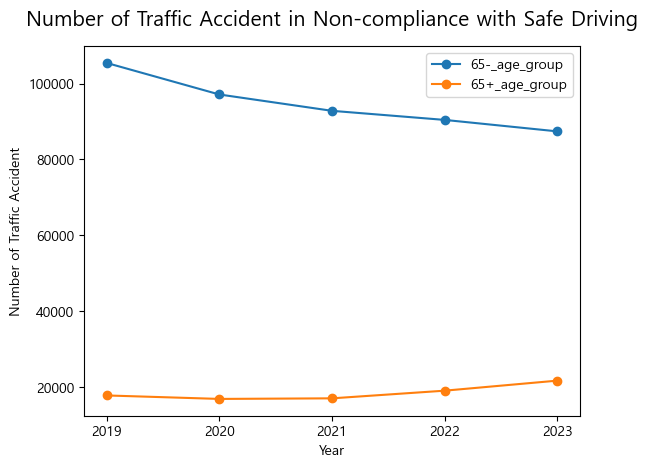

In [9]:
year_labels = ["2019", "2020", "2021", "2022", "2023"]
plt.title("Number of Traffic Accident in Non-compliance with Safe Driving", size=15, pad=15)
plt.xlabel("Year")
plt.ylabel("Number of Traffic Accident")
plt.plot(traffic_accident_safe_df.loc["65-"], marker="o", label="65-_age_group")
plt.plot(traffic_accident_safe_df.loc["65+"], marker="o", label="65+_age_group")
plt.xticks(ticks=range(len(year_labels)), labels=year_labels)
plt.legend(loc="best")
plt.savefig("./result/traffic_accident_safe.png", bbox_inches="tight")